In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_mdc_tokens = pd.read_csv('mdc_top_tokens.csv')

In [45]:
top_ten_by_tx = df_mdc_tokens[['TOKEN_ADDRESS', 'TXNS']].head(10)

In [46]:
top_ten_by_tx['TOKEN'] = ['KIWIF', 'JERRY', 'PATAPAK', 'Q', 'melon', 'OMAGA', 'AXO', 'BB', 'KURT', 'WW']

In [47]:
df = top_ten_by_tx[['TOKEN', 'TXNS']]
df.index += 1
df

,TOKEN,TXNS
1,KIWIF,18108
2,JERRY,7803
3,PATAPAK,4798
4,Q,4358
5,melon,4129
6,OMAGA,2269
7,AXO,2215
8,BB,2202
9,KURT,2130
10,WW,1735


In [10]:
df_mdc_tokens.columns

Index(['TOKEN_ADDRESS', 'TXNS', 'VOLUME', 'UNIQUE_TRADERS'], dtype='object')

In [43]:
top_ten_by_vol = df_mdc_tokens[['TOKEN_ADDRESS', 'VOLUME']].sort_values(by='VOLUME', ascending=False).head(10)
top_ten_by_vol.VOLUME = top_ten_by_vol.VOLUME.astype('int')

In [40]:
top_ten_by_vol['TOKEN'] = ['JERRY', 'AXO', 'melon', 'BB', 'KIWIF', 'MELO', 'OMAGA', 'PATAPAK', 'MONZILLA', 'KURT']
df = top_ten_by_vol[['TOKEN', 'VOLUME']].copy()
df.rename(columns={'VOLUME': 'VOLUME (MON)'}, inplace=True)
df.reset_index(drop=True, inplace=True)
df.index += 1
df

,TOKEN,VOLUME (MON)
1,JERRY,107630
2,AXO,37724
3,melon,27318
4,BB,24059
5,KIWIF,23658
6,MELO,17719
7,OMAGA,13179
8,PATAPAK,12108
9,MONZILLA,12019
10,KURT,11906


In [34]:
top_ten_by_traders = df_mdc_tokens[['TOKEN_ADDRESS', 'UNIQUE_TRADERS']].sort_values(by='UNIQUE_TRADERS', ascending=False).head(10)

In [42]:
top_ten_by_traders['TOKEN'] = ['JERRY', 'KIWIF', 'AXO', 'melon', 'PATAPAK', 'BB', '99', 'WW', 'OMAGA', 'KURT']
df = top_ten_by_traders[['TOKEN', 'UNIQUE_TRADERS']].reset_index(drop=True)
df.index += 1
df

,TOKEN,UNIQUE_TRADERS
1,JERRY,2615
2,KIWIF,1183
3,AXO,1023
4,melon,953
5,PATAPAK,950
6,BB,882
7,99,796
8,WW,754
9,OMAGA,725
10,KURT,629


In [48]:
df_daily_traffic = pd.read_csv('daily_traffic.csv')
df_daily_traffic.head()

,DAY,TXNS,VOLUME,TRADERS,TOKENS_TRADED
0,2025-02-19,933,2.899377e+03,335,158
1,2025-02-20,5933,1.016943e+06,1483,607
2,2025-02-21,5836,5.974394e+04,2225,733
3,2025-02-22,8081,1.056198e+04,2723,550
4,2025-02-23,17717,3.403150e+04,4267,1064


In [54]:
tick_spacing = 10

In [71]:
mdc_start_idx = df_daily_traffic.index[df_daily_traffic.DAY == '2025-05-05'][0]
df_mdc_week = df_daily_traffic.iloc[mdc_start_idx:mdc_start_idx + 5]

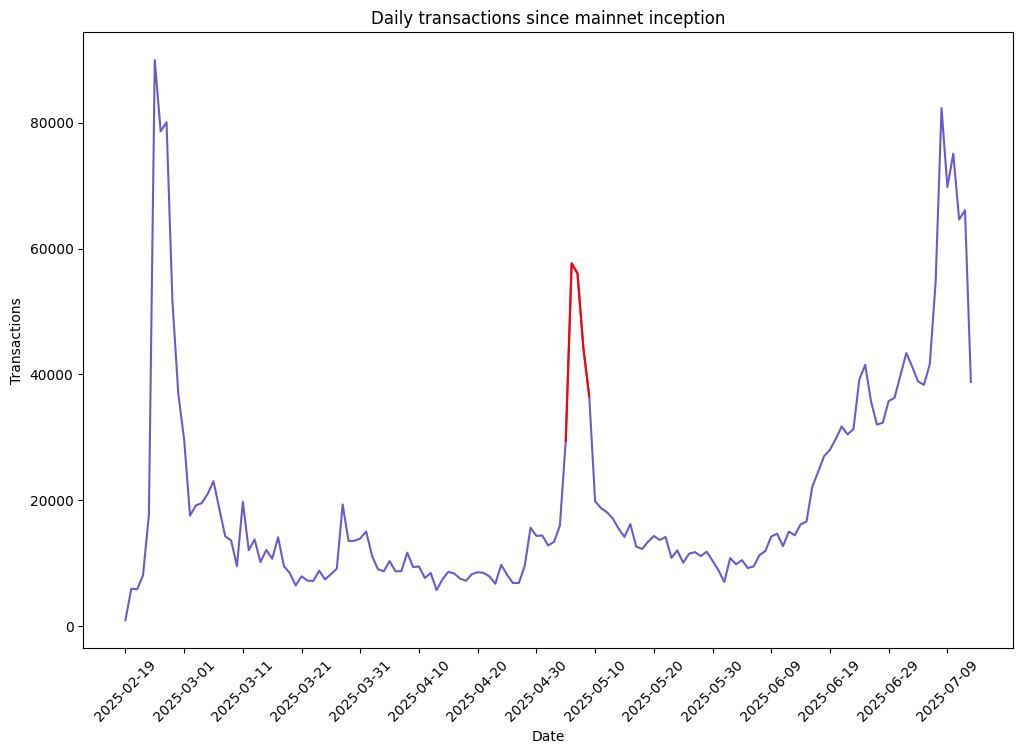

In [79]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(df_daily_traffic.DAY, df_daily_traffic.TXNS, color='slateblue')
plt.plot(df_mdc_week.DAY, df_mdc_week.TXNS, color='red')
ax.set_xticks(df_daily_traffic['DAY'][::tick_spacing])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title('Daily transactions since mainnet inception')
plt.show()

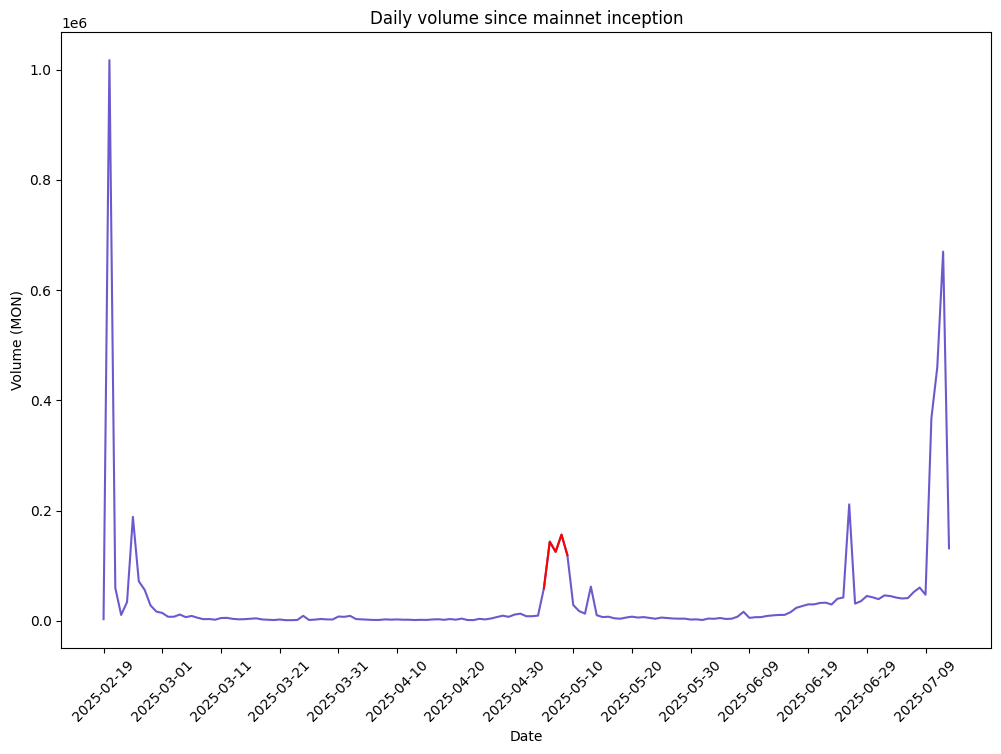

In [80]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(df_daily_traffic.DAY, df_daily_traffic.VOLUME, color='slateblue')
plt.plot(df_mdc_week.DAY, df_mdc_week.VOLUME, color='red')
ax.set_xticks(df_daily_traffic['DAY'][::tick_spacing])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Volume (MON)')
plt.title('Daily volume since mainnet inception')
plt.show()

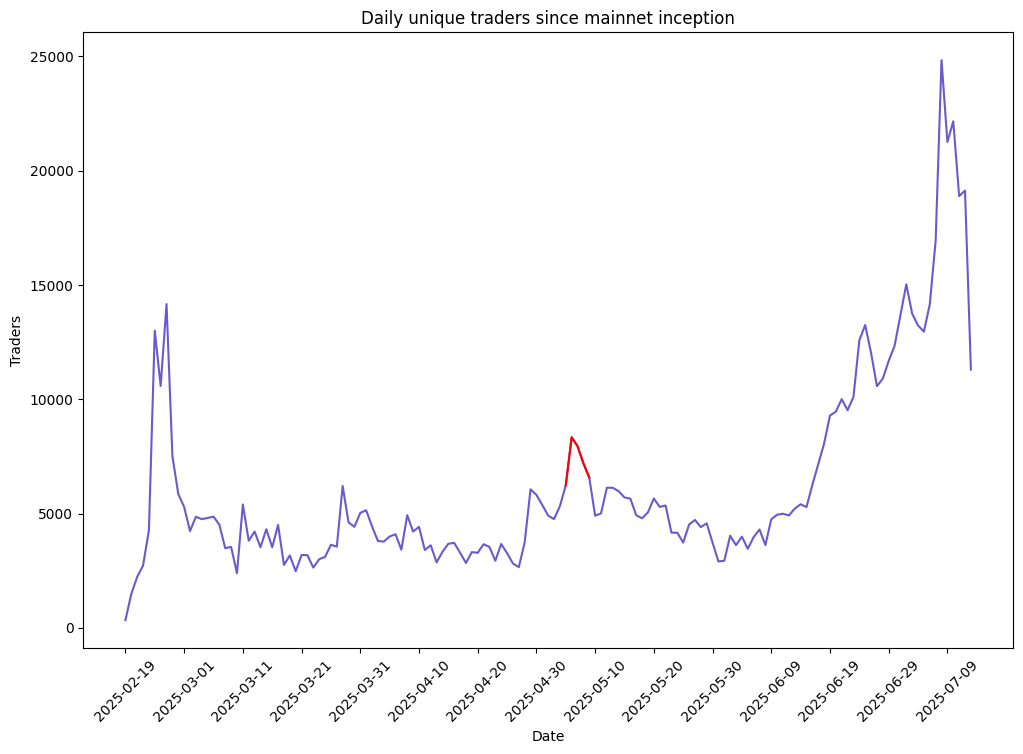

In [81]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(df_daily_traffic.DAY, df_daily_traffic.TRADERS, color='slateblue')
plt.plot(df_mdc_week.DAY, df_mdc_week.TRADERS, color='red')
ax.set_xticks(df_daily_traffic['DAY'][::tick_spacing])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Traders')
plt.title('Daily unique traders since mainnet inception')
plt.show()

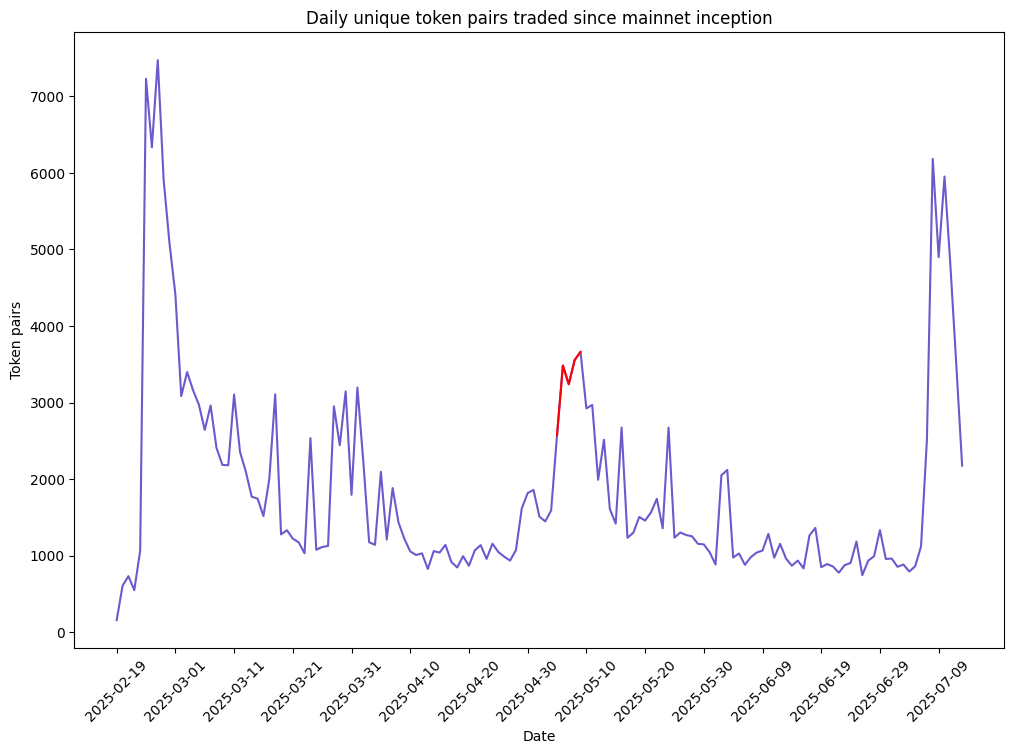

In [82]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(df_daily_traffic.DAY, df_daily_traffic.TOKENS_TRADED, color='slateblue')
plt.plot(df_mdc_week.DAY, df_mdc_week.TOKENS_TRADED, color='red')
ax.set_xticks(df_daily_traffic['DAY'][::tick_spacing])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Token pairs')
plt.title('Daily unique token pairs traded since mainnet inception')
plt.show()